In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import glob
from scipy.signal import butter, lfilter, freqz
%matplotlib inline

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = .5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b,a = butter_bandpass(lowcut, highcut, fs, order=order)
    y=lfilter(b, a, data)
    return y



In [3]:
datafiles= glob.glob('../train/subj1_series1_*.csv')
print datafiles

['../train/subj1_series1_data.csv', '../train/subj1_series1_events.csv']


In [4]:
data_tbl = pd.read_csv(datafiles[0]); events_tbl = pd.read_csv(datafiles[-1])
fdata_tbl = data_tbl.copy(); #store processed data here
print data_tbl.keys()
print events_tbl.keys()

Index([u'id', u'Fp1', u'Fp2', u'F7', u'F3', u'Fz', u'F4', u'F8', u'FC5',
       u'FC1', u'FC2', u'FC6', u'T7', u'C3', u'Cz', u'C4', u'T8', u'TP9',
       u'CP5', u'CP1', u'CP2', u'CP6', u'TP10', u'P7', u'P3', u'Pz', u'P4',
       u'P8', u'PO9', u'O1', u'Oz', u'O2', u'PO10'],
      dtype='object')
Index([u'id', u'HandStart', u'FirstDigitTouch', u'BothStartLoadPhase',
       u'LiftOff', u'Replace', u'BothReleased'],
      dtype='object')


In [5]:
#get rid of pesky id, just repeats same subj#_trial#
fdata_tbl.drop('id',axis=1,inplace=True) 
events_tbl.drop('id',axis=1,inplace=True) 

In [8]:
#low band pass filter all channels
fs = 500 #Hz
lowcut = 2 #Hz
highcut = 8 #Hz
# b, a = butter_bandpass(lowcut, highcut, fs, order=4)
# w, h = freqz(b, a, worN=2000)
# plt.plot((fs * .5/n.pi) * w, abs(h))
# plt.xlim(0,20)
for k in fdata_tbl.keys():
    fdata_tbl[k] = butter_bandpass_filter(fdata_tbl[k], lowcut, highcut, fs, order=4)

In [10]:
#average same event types together
def ensemble_avg(chan_data, event):
    ans = n.zeros(150)
    index = 0
    cnt = 0
    while True:
        index_arr = n.where(event[index:] == 1)[0]
        if len(index_arr) == 0: break
        index+= index_arr[0]
#         print event[index-1],event[index],'    ', event[index+149],event[index+150]
        ans=ans + chan_data.values[index:index+150]
        index+= 150 #set to next 0 in array, now can look for next 1
        cnt+=1
    return ans/cnt

averages = {}
for chan in fdata_tbl.keys(): 
    print "chan= ",chan
    averages[chan] = {}
    for event in events_tbl.keys():
        print "event= ",event
        averages[chan][event]= ensemble_avg(fdata_tbl[chan], events_tbl[event])

chan=  Fp1
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  Fp2
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  F7
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  F3
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  Fz
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  F4
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  F8
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoadPhase
event=  LiftOff
event=  Replace
event=  BothReleased
chan=  FC5
event=  HandStart
event=  FirstDigitTouch
event=  BothStartLoad

In [ ]:
#covert averages dict to 2D numpy array

#PCA on numpy array

In [ ]:
#ICA on PCA components

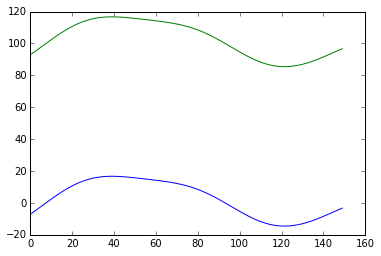

In [14]:
plt.plot(ensemble_avg(fdata_tbl.Fp2, events_tbl['Replace']))
plt.plot(averages['Fp2']['Replace']+100)

In [39]:
pca = PCA(n_components=3)
type(X)

numpy.ndarray

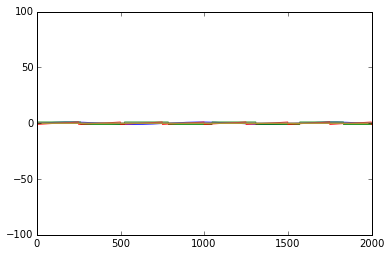

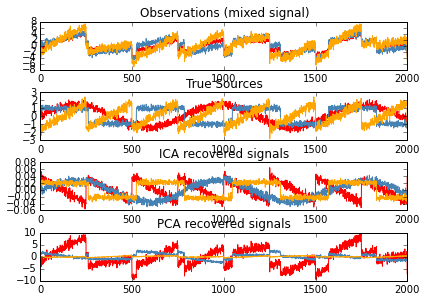

In [29]:
from sklearn.decomposition import FastICA, PCA
from scipy import signal
###############################################################################
# Generate sample data
n.random.seed(0)
n_samples = 2000
time = n.linspace(0, 8, n_samples)

s1 = n.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = n.sign(n.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * n.pi * time)  # Signal 3: saw tooth signal
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

S = n.c_[s1, s2, s3]
S += 0.2 * n.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = n.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = n.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
plt.plot(S_)
plt.plot(A_)
# We can `prove` that the ICA model applies by reverting the unmixing.
assert n.allclose(X, n.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

###############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [33]:
H.shape

(2000, 3)

In [32]:
A_.shape,S_.shape,S.shape

((3, 3), (2000, 3), (2000, 3))